In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_set = pd.read_csv(r'C:\Users\meirk\Desktop\fashionMnist\fashion-mnist_train.csv\fashion-mnist_train.csv')

In [5]:
train_copy = train_set.copy()
train_copy

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
labels_list = {0: 't-shirt', 1: 'pants', 2: 'swetear', 3: 'dress', 4: 'coat',
              5: 'sandal', 6: 'shirt', 7: 'shoe', 8: 'bag', 9: 'boot'}

labels_df = pd.DataFrame([[0,'t-shirt'], [1,'pants'], [2,'swetear'], [3,'dress'], [4,'coat'],
              [5,'sandal'], [6,'shirt'], [7,'shoe'],[8,'bag'],[9,'boot']], columns=["id", "category"])
labels_df

,id,category
0,0,t-shirt
1,1,pants
2,2,swetear
3,3,dress
4,4,coat
5,5,sandal
6,6,shirt
7,7,shoe
8,8,bag
9,9,boot


In [8]:
train_copy = train_copy.merge(right= labels_df,how='inner',
                                      left_on='label', right_on='id').drop(axis =1,columns='id')
train_copy

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,category
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
1,2,0,0,0,0,1,1,0,0,0,...,0,118,190,162,82,0,0,0,0,swetear
2,2,0,0,0,0,0,0,0,0,16,...,0,1,1,1,1,0,0,0,0,swetear
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants
59996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants
59997,1,0,0,0,0,0,0,0,0,24,...,25,0,0,0,0,0,0,0,0,pants
59998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants


In [9]:
target_set = train_set['label']
train_without_label = train_set.drop(['label'], axis = 1)

### Data vizualizaton

In [10]:
def get_pixel_cols():
    return ['pixel' + str(i) for i in range(1, 785)]

def index_to_pixels(df, index):
    return df.iloc[index][get_pixel_cols()]

def plot_image_pd(pixels_series):
    pix_mat = pixels_series.values.reshape(28, 28)
    imgplot = plt.imshow(pix_mat, cmap='gray')

In [11]:
labels = train_set.label.value_counts().index.values.tolist()
labels = sorted(labels)

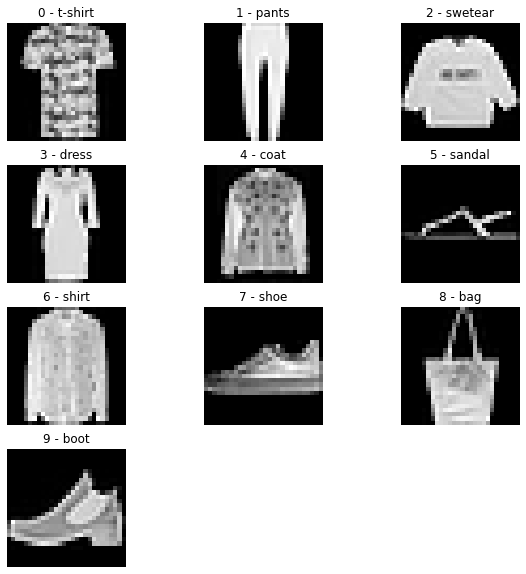

In [12]:
plt.figure(figsize=(10,10))
plt.plot([4, 3, 11])
for lab in labels:
    ax = plt.subplot(4, 3, lab+1)
    ax.set_title(str(lab) + " - " + labels_list[lab])
    plt.axis('off')
    plot_image_pd(index_to_pixels(train_set, train_set[train_set.label == lab].index[0]))

##### See if the data is balanced (distribution)

In [13]:
df_count = train_copy.groupby(['label','category'])['pixel1'].count()
df_count

label  category
0      t-shirt     6000
1      pants       6000
2      swetear     6000
3      dress       6000
4      coat        6000
5      sandal      6000
6      shirt       6000
7      shoe        6000
8      bag         6000
9      boot        6000
Name: pixel1, dtype: int64

The data is balanced, it means each label has the same data points that represent it.

Lets look on it with catplot:

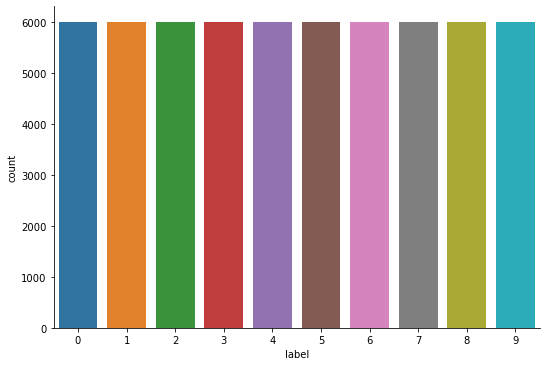

In [14]:
sns.catplot(data=train_copy,kind='count',height=5,aspect=1.5,x='label')

### Standardation

Learning process with large numbers is slower, so I will normalize the pixels values to be between 0 and 1 to get better prforamnce.

In [15]:
def normalize(set):
    set = set / 255.0
    return np.array(set)

train_without_label = normalize(train_without_label)
train_without_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now the learning process should be done faster.

### Feature engineering:

In [16]:
train_set.info()
# No need to encode any feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [17]:
train_set.isnull().sum()
#No null values, no action required

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Scaling and dimensionality reduction using PCA:

In [18]:
labels_s = train_copy['label']
labels_DF = labels_s.to_frame(name='label')

In [19]:
scale = StandardScaler()
train_scaled = scale.fit_transform(train_without_label)

In [20]:
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_scaled)

In [22]:
#That's how the data looks like now- after PCA and Scaling
train_pca = pd.DataFrame(train_pca)
train_pca

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,10.664973,14.993363,-0.689468,-10.980911,4.788254,0.559623,2.141115,-2.582798,-4.525370,-0.758691,...,0.142880,0.037486,0.277828,-1.205771,0.210066,-0.386381,0.000209,-0.035115,-0.356141,0.312497
1,-11.989748,11.812770,-5.801049,-3.418629,-4.630650,2.061772,-3.109565,-3.308504,-4.461980,5.669061,...,0.550207,0.404277,-0.123404,0.369748,-0.101614,-0.166547,0.178576,0.087425,-0.695472,-0.354024
2,20.517671,1.579784,6.770122,-2.884371,-5.379185,2.618096,-0.246181,-2.936941,3.415353,-1.236735,...,-0.058268,0.402320,0.244256,0.195486,0.601754,-0.082025,-0.363810,0.827070,0.195765,0.107805
3,9.634535,-6.790917,-0.907860,4.577228,8.377438,-0.094376,-8.672806,-0.604500,-2.566944,-3.070933,...,-0.727466,0.297704,-0.187750,-0.811716,-0.155041,-0.101963,0.576740,0.107560,-0.692768,-0.159291
4,11.493442,-11.655488,-7.208334,-4.772964,-0.594114,0.553685,0.388620,-0.384219,2.063610,-4.824830,...,-0.272546,-0.084920,-0.864631,-0.499819,0.580007,0.821251,0.351122,0.405849,0.493895,-0.238394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.871480,15.580971,-11.665720,9.018102,-7.432314,-3.170016,-3.461792,-4.493587,-1.647476,-1.947253,...,-0.438649,-0.677479,-0.099344,1.446477,0.452725,0.088339,0.128215,-0.386146,-0.022989,-0.067890
59996,-10.172701,-14.933856,-0.769995,3.220531,-0.104116,-1.231324,5.674792,-0.981362,-2.317314,2.047084,...,-0.525966,0.100894,-0.081909,0.122895,0.445433,-0.020914,0.188299,-0.114672,-0.113321,0.509827
59997,7.148767,-0.543565,-0.874060,-1.501746,-6.148917,18.263320,2.234245,-2.135960,3.729180,2.975972,...,-0.494779,-0.574190,0.124885,-0.151356,-0.218440,-0.293949,-0.050627,-0.353553,0.095026,0.288544
59998,4.434153,20.832704,-0.576302,-0.035641,2.830417,4.867025,11.700803,-0.857599,-2.728543,-1.727854,...,0.245002,-1.310118,-0.838299,-1.344087,-0.287859,2.201887,-0.973674,0.935035,-1.477538,-1.425697


After standaraize our data and reduced dimentionality with PCA we are ready to train some models.

### Train test split:

In [23]:
x_train_pca_, x_test_pca_, y_train_pca_, y_test_pca_ = train_test_split(train_pca, target_set, test_size=0.3, random_state=42)

In [24]:
#confusion matrix
def cm_(y_true, y_pred, labels, figsize=(9,8)):
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    plt.show()


## Modeling

#### Logistic regression: 

In [25]:
log_reg = LogisticRegression(random_state=42, max_iter=500, n_jobs=4)
log_reg.fit(x_train_pca_,y_train_pca_)
log_pred = log_reg.predict(x_test_pca_)

In [26]:
score_log = metrics.accuracy_score(y_true=y_test_pca_,y_pred=log_pred)
print("score of logistic regression: ",score_log)

score of logistic regression:  0.8508888888888889


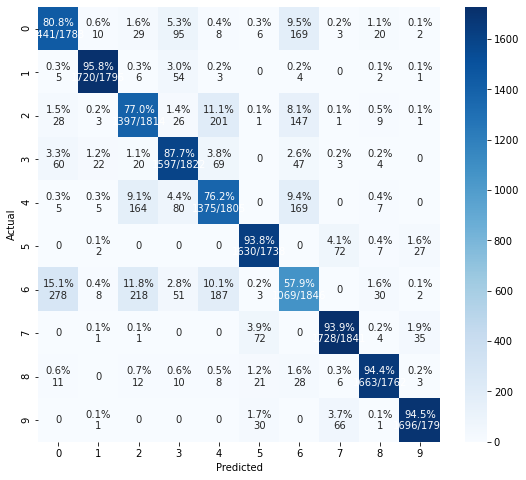

In [27]:
cm_(y_test_pca_,log_pred, log_reg.classes_)

In [28]:
#for later use
log_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=log_pred,average='weighted')
log_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=log_pred,average='weighted')
log_f1 = metrics.f1_score(y_true=y_test_pca_, y_pred=log_pred, average='weighted')

print(metrics.classification_report(y_true=y_test_pca_,y_pred=log_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1783
           1       0.97      0.96      0.96      1795
           2       0.76      0.77      0.76      1814
           3       0.83      0.88      0.86      1822
           4       0.74      0.76      0.75      1805
           5       0.92      0.94      0.93      1738
           6       0.65      0.58      0.61      1846
           7       0.92      0.94      0.93      1841
           8       0.95      0.94      0.95      1762
           9       0.96      0.95      0.95      1794

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



#### RandomForestCllassifier:

first I'm going to find the best parameters for RandomForest classifier

In [29]:
params = {"n_estimators":range(1,20,2),"criterion":['gini','entropy']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=5 )
grid_search.fit(x_train_pca_,y_train_pca_.ravel())
print(grid_search.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=19)


In [30]:
rnd_clf = RandomForestClassifier(n_estimators=19, criterion='entropy')
rnd_clf.fit(x_train_pca_,y_train_pca_)
rnd_pred = rnd_clf.predict(x_test_pca_)

In [31]:
score_rnd = metrics.accuracy_score(y_true=y_test_pca_, y_pred =rnd_pred)
print("score rnd: ", score_rnd)

score rnd:  0.8461666666666666


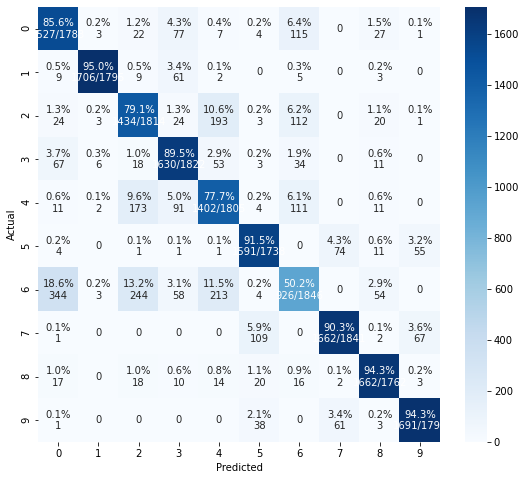

In [32]:
cm_(y_test_pca_,rnd_pred, rnd_clf.classes_)

In [33]:
#for later use
rnd_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=rnd_pred,average='weighted')
rnd_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=rnd_pred,average='weighted')
rnd_f1 = metrics.f1_score(y_true=y_test_pca_, y_pred=rnd_pred, average='weighted')

print(metrics.classification_report(y_true=y_test_pca_,y_pred=rnd_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1783
           1       0.99      0.95      0.97      1795
           2       0.75      0.79      0.77      1814
           3       0.84      0.89      0.86      1822
           4       0.74      0.78      0.76      1805
           5       0.90      0.92      0.91      1738
           6       0.70      0.50      0.59      1846
           7       0.92      0.90      0.91      1841
           8       0.92      0.94      0.93      1762
           9       0.93      0.94      0.94      1794

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.84     18000
weighted avg       0.84      0.85      0.84     18000



#### AdaBoost classifier

First, find the best prarmeters for DecisonTree: 

In [34]:
params2 = {"criterion":['gini','entropy'],'min_samples_split':range(2,20,2)}

grid_search2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params2,cv=5 )
grid_search2.fit(x_train_pca_,y_train_pca_.ravel())
print(grid_search2.best_estimator_)

DecisionTreeClassifier(criterion='entropy', min_samples_split=16)


Now, train AdaBoost classifier with best parameters:

In [36]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',min_samples_split=16))
ada_clf.fit(x_train_pca_,y_train_pca_)
ada_pred = ada_clf.predict(x_test_pca_)

In [37]:
score_ada = metrics.accuracy_score(y_true=y_test_pca_, y_pred =ada_pred)
print("score ada: ", score_ada)

score ada:  0.8457222222222223


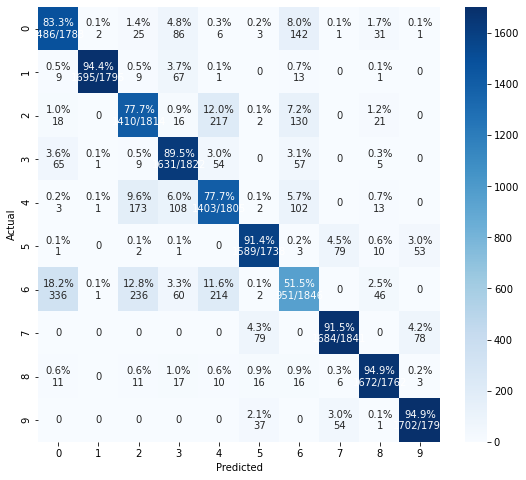

In [38]:
cm_(y_test_pca_,ada_pred, ada_clf.classes_)

In [39]:
#for later use
ada_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=ada_pred,average='weighted')
ada_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=ada_pred,average='weighted')
ada_f1 = metrics.f1_score(y_true=y_test_pca_, y_pred=ada_pred, average='weighted')

print(metrics.classification_report(y_true=y_test_pca_,y_pred=ada_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1783
           1       1.00      0.94      0.97      1795
           2       0.75      0.78      0.76      1814
           3       0.82      0.90      0.86      1822
           4       0.74      0.78      0.76      1805
           5       0.92      0.91      0.92      1738
           6       0.67      0.52      0.58      1846
           7       0.92      0.91      0.92      1841
           8       0.93      0.95      0.94      1762
           9       0.93      0.95      0.94      1794

    accuracy                           0.85     18000
   macro avg       0.84      0.85      0.84     18000
weighted avg       0.84      0.85      0.84     18000



#### XGBoost classifier

In [40]:
xgb_clf = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
xgb_clf.fit(x_train_pca_,y_train_pca_)
xgb_pred = xgb_clf.predict(x_test_pca_)

In [41]:
score_xgb = metrics.accuracy_score(y_true=y_test_pca_, y_pred =xgb_pred)
print("score xgb: ", score_xgb)

score xgb:  0.8822777777777778


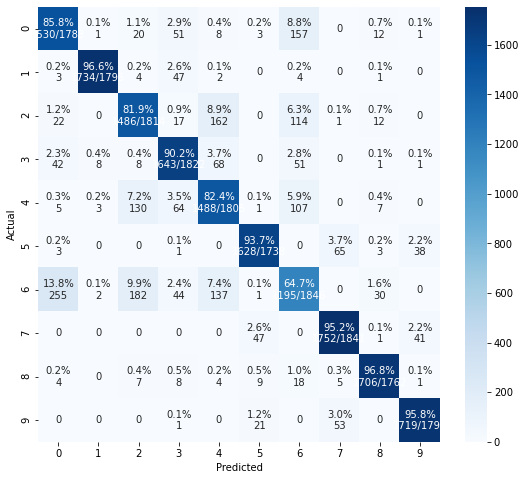

In [42]:
cm_(y_test_pca_,xgb_pred, xgb_clf.classes_)

In [43]:
#for later use
xgb_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=xgb_pred,average='weighted')
xgb_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=xgb_pred,average='weighted')
xgb_f1 = metrics.f1_score(y_true=y_test_pca_, y_pred=xgb_pred, average='weighted')

print(metrics.classification_report(y_true=y_test_pca_,y_pred=xgb_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1783
           1       0.99      0.97      0.98      1795
           2       0.81      0.82      0.81      1814
           3       0.88      0.90      0.89      1822
           4       0.80      0.82      0.81      1805
           5       0.95      0.94      0.94      1738
           6       0.73      0.65      0.68      1846
           7       0.93      0.95      0.94      1841
           8       0.96      0.97      0.97      1762
           9       0.95      0.96      0.96      1794

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



## Subtotal

In [44]:
log_reg_scores = pd.DataFrame(index=['log_reg'],data={'score':score_log,'recall':log_recall,'percision':log_percision,'f1':log_f1})
rnd_scores = pd.DataFrame(index=['rnd'],data={'score':score_rnd,'recall':rnd_recall,'percision':rnd_percision,'f1':rnd_f1})
ada_scores = pd.DataFrame(index=['ada'],data={'score':score_ada,'recall':ada_recall,'percision':ada_percision,'f1':ada_f1})
xgb_scores = pd.DataFrame(index=['xgb'],data={'score':score_xgb,'recall':xgb_recall,'percision':xgb_percision,'f1':xgb_f1})
summarize_df = pd.concat([log_reg_scores,rnd_scores,ada_scores,xgb_scores])
summarize_df

,score,recall,percision,f1
log_reg,0.850889,0.850889,0.849407,0.849803
rnd,0.846167,0.846167,0.844468,0.843050
ada,0.845722,0.845722,0.843861,0.843264
xgb,0.882278,0.882278,0.881455,0.881514


Until now, we can observe that XGBoost classifier has the higest scores in each category!

Now, I will train VotingClassifier to combaine all classifiers in the notebook:

In [45]:
estimators = [('lr',log_reg),('rnd',rnd_clf),('ada',ada_clf),('xgb',xgb_clf)]
vote_clf = VotingClassifier(estimators=estimators,voting='soft')
vote_clf.fit(x_train_pca_,y_train_pca_)
vote_pred = vote_clf.predict(x_test_pca_)

In [46]:
score_voting = metrics.accuracy_score(y_true=y_test_pca_, y_pred =vote_pred)
print("score ada: ", score_voting)

score ada:  0.8742777777777778


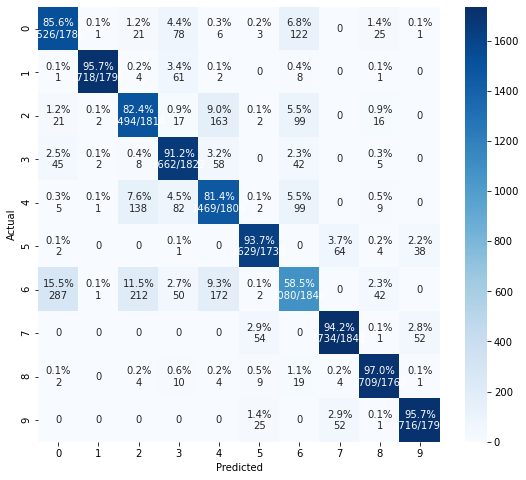

In [47]:
cm_(y_test_pca_,vote_pred, vote_clf.classes_)

In [48]:
#for later use
vote_recall = metrics.recall_score(y_true=y_test_pca_,y_pred=vote_pred,average='weighted')
vote_percision = metrics.precision_score(y_true=y_test_pca_,y_pred=vote_pred,average='weighted')
vote_f1 = metrics.f1_score(y_true=y_test_pca_, y_pred=vote_pred, average='weighted')
vote_score = metrics.accuracy_score(y_true=y_test_pca_, y_pred=vote_pred)
print(metrics.classification_report(y_true=y_test_pca_,y_pred=vote_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1783
           1       1.00      0.96      0.98      1795
           2       0.79      0.82      0.81      1814
           3       0.85      0.91      0.88      1822
           4       0.78      0.81      0.80      1805
           5       0.94      0.94      0.94      1738
           6       0.74      0.59      0.65      1846
           7       0.94      0.94      0.94      1841
           8       0.94      0.97      0.96      1762
           9       0.95      0.96      0.95      1794

    accuracy                           0.87     18000
   macro avg       0.87      0.88      0.87     18000
weighted avg       0.87      0.87      0.87     18000



### comparing XGBoost and Voting

In [49]:
vote_df = pd.DataFrame(index=['voting'], data = {'score':vote_score,'recall':vote_recall,'percision':vote_percision,'f1':vote_f1})
xgb_vote_df = pd.concat([vote_df,xgb_scores])
xgb_vote_df

,score,recall,percision,f1
voting,0.874278,0.874278,0.872830,0.872373
xgb,0.882278,0.882278,0.881455,0.881514


XGBoost has higer score in each parameter, meaning this is the best classifier I have.

### Testing on test set

After training some models, now it's time to test the best model we have with test set. The best model we have is ___ with f1 score of ___ ,so we test it with the test set.

In [63]:
test_set = pd.read_csv(r'C:\Users\meirk\Desktop\fashionMnist\fashion-mnist_test.csv\fashion-mnist_test.csv')

In [64]:
test_copy = test_set.groupby(['label'])['pixel1'].count()
test_copy

label
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
Name: pixel1, dtype: int64

Test data is balanced.

In [65]:
target_set_test = test_set['label']
test_without_label = test_set.drop(['label'], axis = 1)

### PCA and scaling

In [66]:
test_without_label = normalize(test_without_label)

#Scaling
test_set_scaled = scale.transform(test_without_label)

#pca
test_pca = pca.transform(test_set_scaled)

###### Final prediction!

score xgb:  0.8846


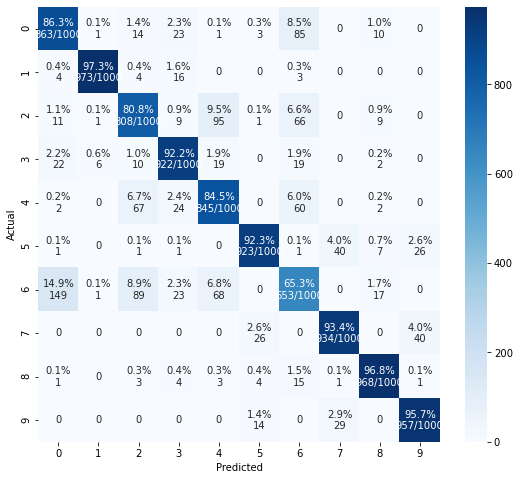

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.90      0.92      0.91      1000
           4       0.82      0.84      0.83      1000
           5       0.95      0.92      0.94      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [67]:
xgb_final = xgb_clf.predict(test_pca)

score_xgb_final = metrics.accuracy_score(y_true=target_set_test, y_pred =xgb_final)
print("score xgb: ", score_xgb_final)

cm_(target_set_test,xgb_final, xgb_clf.classes_)

print(metrics.classification_report(y_true=target_set_test,y_pred=xgb_final))

**XGBOOST model perform good on the test set!**